In [86]:
!ls input_files/

cube_in.msh      ogrid2.msh       tip.msh          wing.msh
gaika_radmir.msh pot.msh          tor_radmir.msh
ogrid1.msh       semi_sphere.msh  vilka_radmir.msh


In [18]:
%%writefile benchmark.sh

rm -rf benchmarks
mkdir benchmarks


for f in $(ls input_files/); do
    for i in $(seq 1 450); do
        echo $f >> ./benchmarks/args.txt
    done
done

cat ./benchmarks/args.txt | xargs -P 8 -I % bash -c \ 
    '{ time ./executable input_files/% out.msh; } 2>&1 | cat >> benchmarks/%.benchmark'


Overwriting benchmark.sh


In [45]:
# %%sh
# bash benchmark.sh

In [46]:
!cp -r benchmarks benchmarks450

In [60]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [84]:
%%sh
rm -rf histograms
mkdir histograms

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


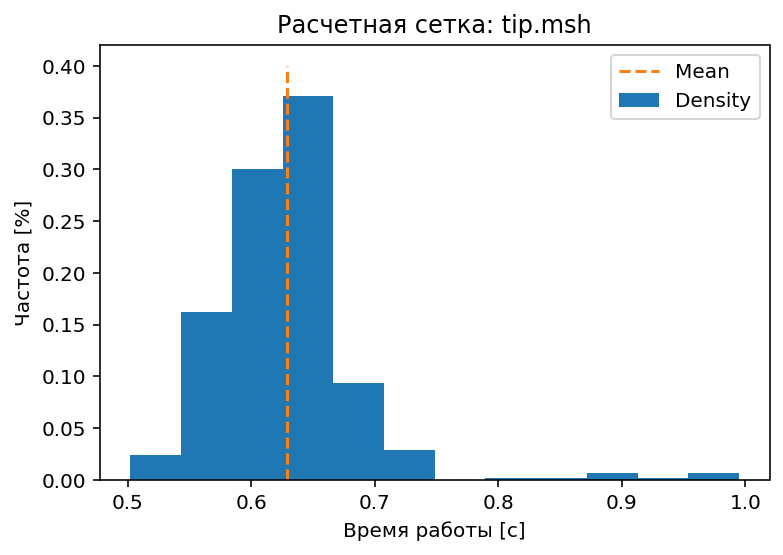

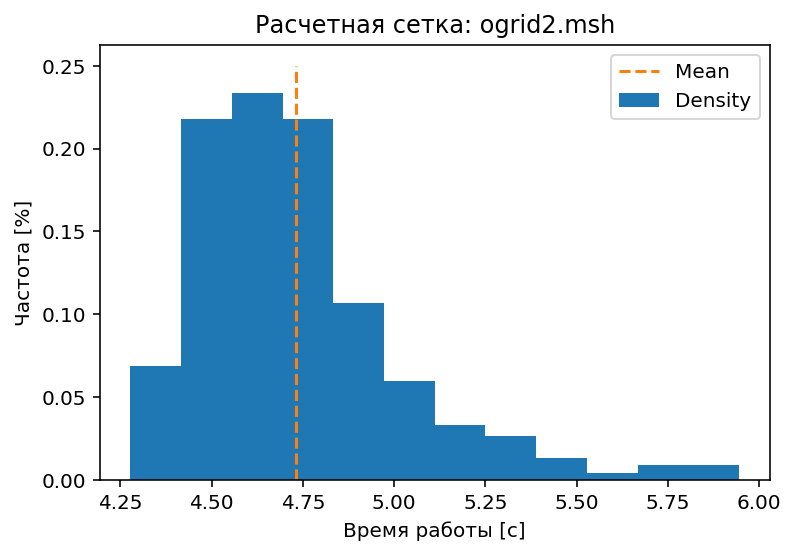

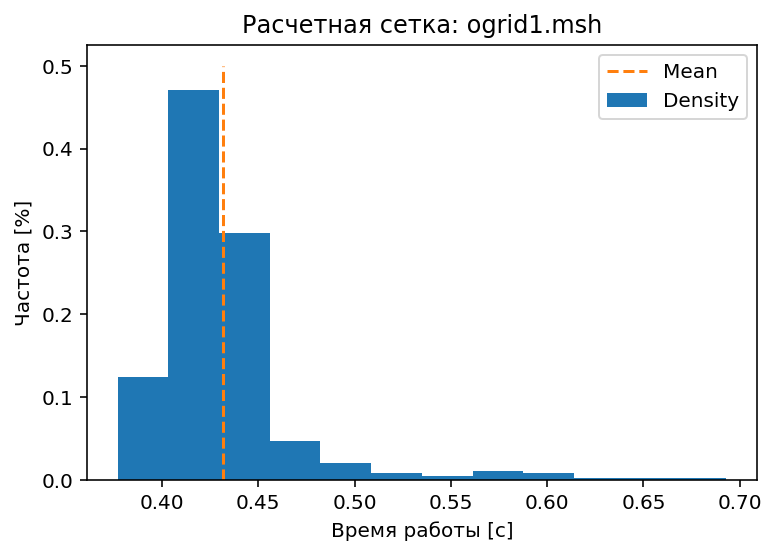

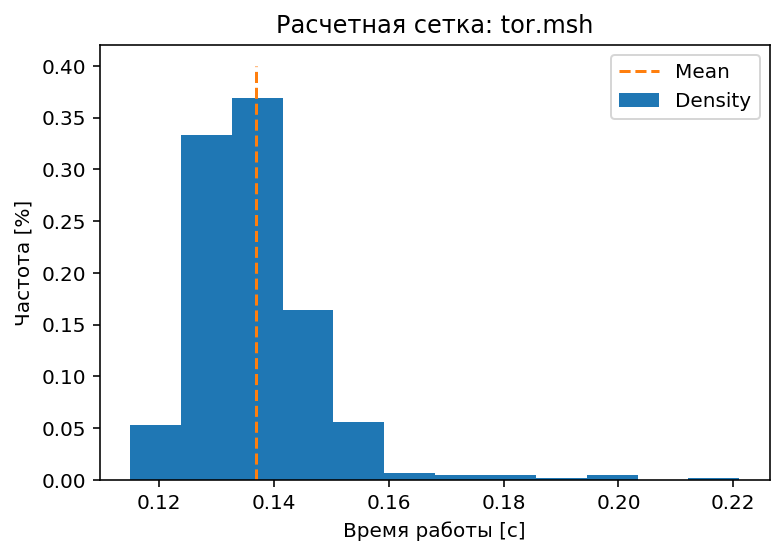

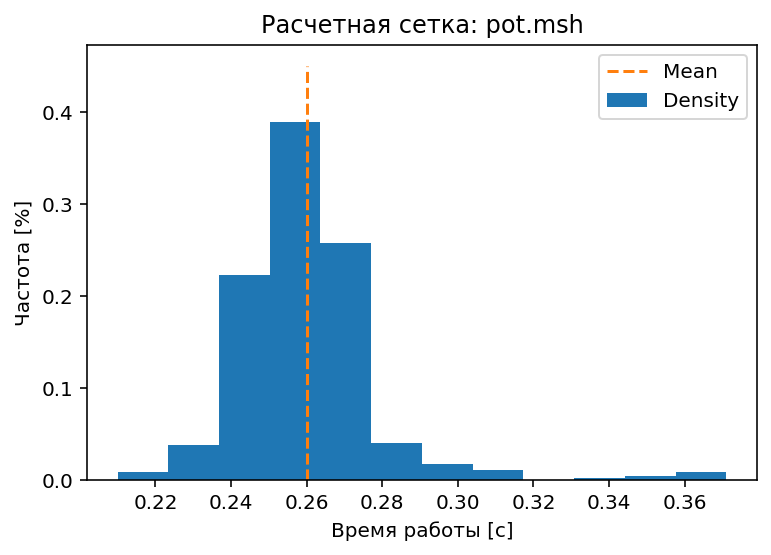

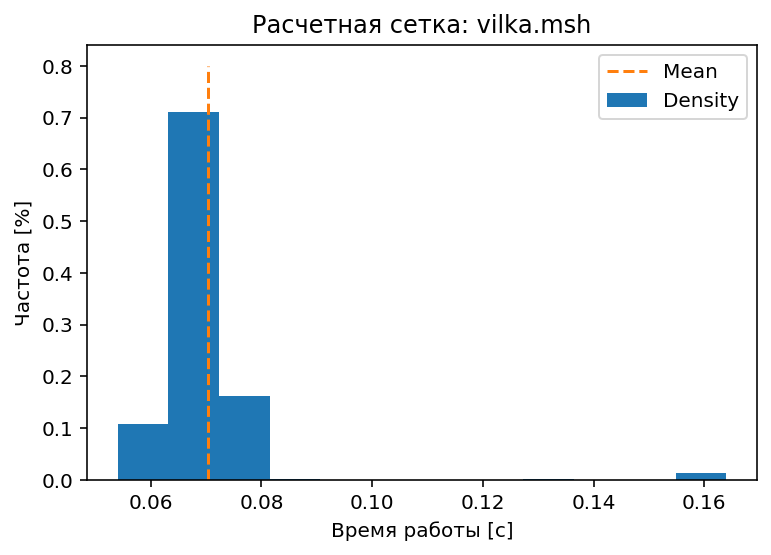

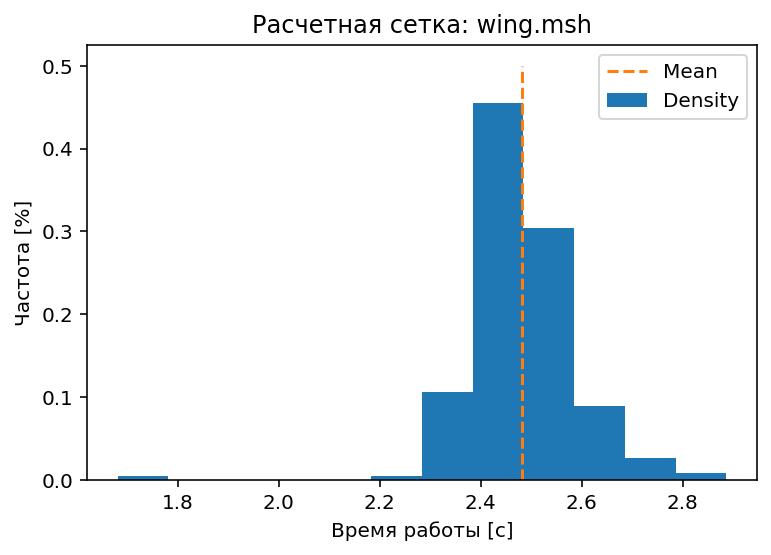

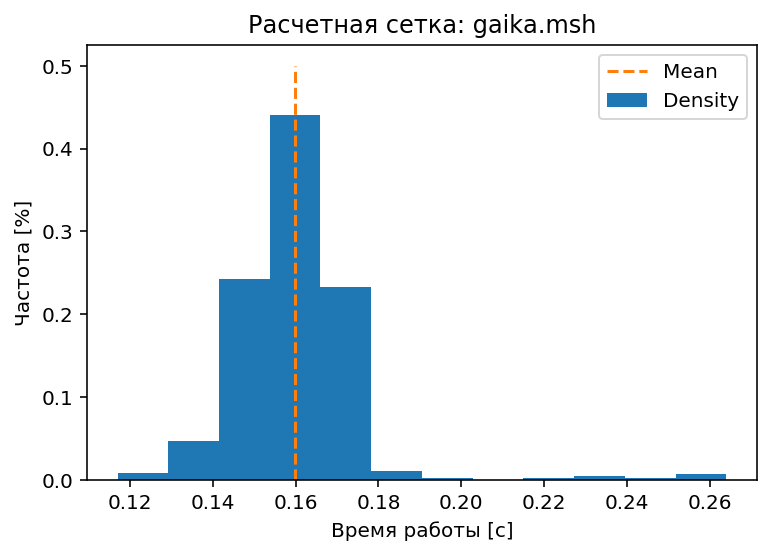

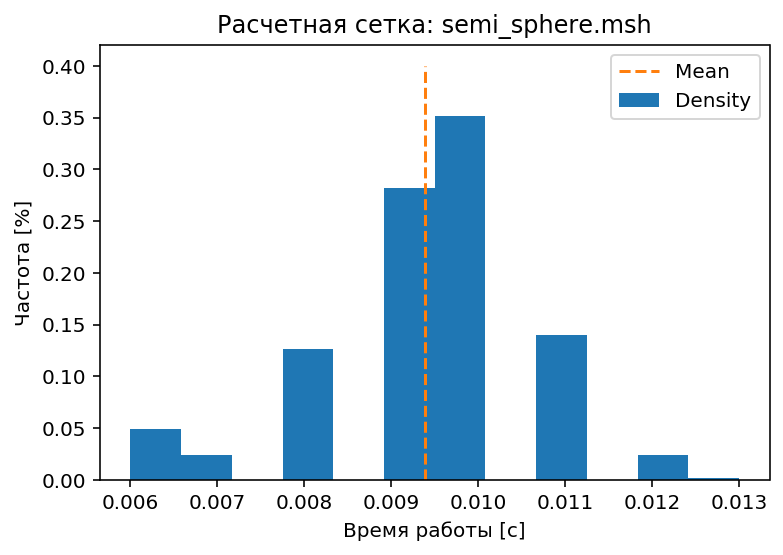

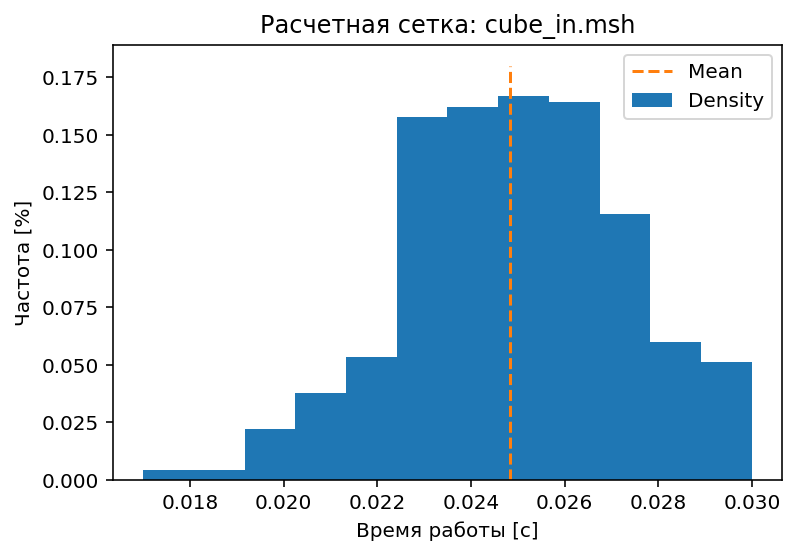

In [85]:
benchmarks_files = os.listdir("benchmarks450/")
benchmarks_files = filter(lambda x: x != "args.txt", benchmarks_files)

benchmarks_meta = []


for benchmark_file in benchmarks_files:
    seconds = []
    with open(f"benchmarks/{benchmark_file}", "r") as file_in:
        lines = file_in.readlines()
        
        name = lines[0].strip()
        print(name)
        lines = filter(lambda x: x != "\n", lines)
        for line in lines:
            if "real" in line:
                time_ = line.split("\t")[1].strip()
                time_ = time_[:-1] # cut 't'
                time_ = time_.split("m")[1] # no minutes, only seconds
                time_ = float(time_.replace(",", ".")) # 
                seconds.append(time_)
                
        
    sec_pd = pd.Series(seconds)
    sec_pd.name = 'Density'
    fig = plt.figure()
    
    ax = sec_pd.plot.hist(bins=12, weights = np.ones_like(sec_pd.index) / len(sec_pd.index))
    
    mu = sec_pd.mean()
    std = sec_pd.std()
    
    benchmark_file = benchmark_file.replace("_radmir", "")
    
    ax.set_title(f"Расчетная сетка: {benchmark_file.split('.')[0]}.msh")
    ax.set_ylabel("Частота [%]")
    ax.set_xlabel("Время работы [с]")
    
    mean_line = ax.plot([mu]*len(plt.yticks()[0]), plt.yticks()[0], label='Mean', linestyle='--')
    plt.legend(loc="upper right")
    # fig = ax.get_figure()
    fig.savefig(f"histograms/{benchmark_file.split('.')[0]}_mu={mu}_std={std}.eps", format='eps')
    
    benchmarks_meta.append([
        f"{benchmark_file.split('.')[0]}.msh",
        
    ])